In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import nltk

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [2]:
df = pd.read_excel('Problem_C_Data_Wordle.xlsx', header=1)
df=df[df.columns[1:]]
df.head()
# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码


Date  Contest number   Word  Number of  reported results  \
0 2022-12-31             560  manly                        20380   
1 2022-12-30             559  molar                        21204   
2 2022-12-29             558  havoc                        20001   
3 2022-12-28             557  impel                        20160   
4 2022-12-27             556  condo                        20879   

   Number in hard mode  1 try  2 tries  3 tries  4 tries  5 tries  6 tries  \
0                 1899      0        2       17       37       29       12   
1                 1973      0        4       21       38       26        9   
2                 1919      0        2       16       38       30       12   
3                 1937      0        3       21       40       25        9   
4                 2012      0        2       17       35       29       14   

   7 or more tries (X)  
0                    2  
1                    1  
2                    2  
3                    1  
4                    3

预处理：
1. 百分比之和可能不等于1，所以对其进行归一化  
2. 按照'Contest Number'对整个表进行升序排列  
3. 判断当前日期是否为周末，为周几  

In [3]:
df = pd.read_excel('Problem_C_Data_Wordle.xlsx', header=1)
df=df[df.columns[1:]]
#  对尝试次数进行归一化，使其结果和等于100
df = df.sort_values(by='Contest number', ignore_index=True)
percent = df[df.columns[5:]].sum(axis=1)
for column in df.columns[5:]:
    df[column]=df[column]/percent*100
# 判断当前日期为周几，周一为0，依次增加  
df['week']=df['Date'].apply(lambda x:x.weekday())
df['is_weekend'] = df['week'].apply(lambda x:x>4)

# 第一题  
第一小问：  
Q：报告结果的数量每天都在变化。开发一个模型来解释这种变化，并使用您的模型为2023年3月1日报告的结果数量创建一个预测区间。    
首先判断是否与周几有关，如果有则将该参数加入模型中，如果没有则不加入  
使用时间预测模型，或者二次函数训练，使用留一法等交叉验证方法得到关于模型准确率的描述。  
第二小问：  
Q：单词的任何属性是否会影响在硬模式下播放的报告分数百分比？如果是，怎么办？如果没有，为什么不呢？  
A： 任何属性可以包括：唯一字母的数量，单词的词性，常见度，字母的词频  
   差异度分析，相关性分析  

## 分析整体的星期几对得分均值的影响

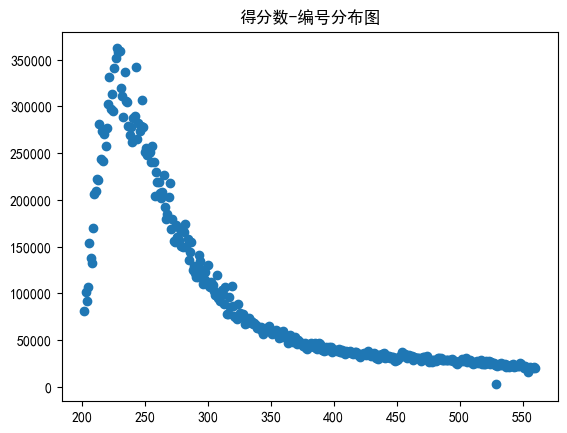

In [4]:
plt.scatter(df['Contest number'], df['Number of  reported results'])
plt.title('得分数-编号分布图')
plt.savefig('得分数-编号分布图')
plt.show()

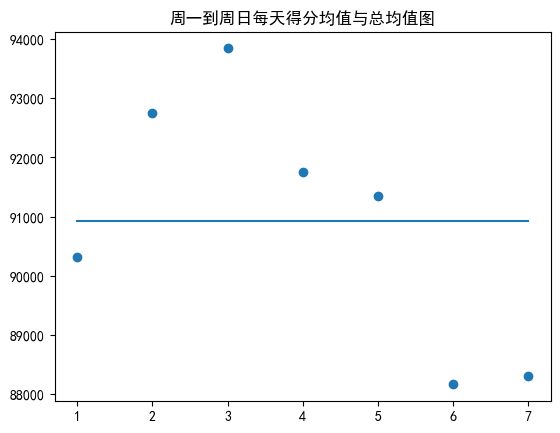

In [5]:
weeks = []
for week in range(7):
    df1 = df[df['week']==week]
    weeks.append(df1['Number of  reported results'].mean())
plt.scatter([i+1 for i in range(7)], weeks)
plt.plot([i+1 for i in range(7)], [df['Number of  reported results'].mean() for i in range(7)])
plt.title('周一到周日每天得分均值与总均值图')
# 其中直线为总均值图，散点图为每天的
plt.savefig('周一到周日每天得分均值与总均值图')
plt.show()

In [6]:
# 整体得分与星期几之间的相关性
np.corrcoef(df['week'], df['Number of  reported results'])


array([[ 1.        , -0.01421786],
       [-0.01421786,  1.        ]])

可以看到，在整个时间段中，星期几与得分情况的相关性不大，甚至可以说不相关。

## 取得分总体趋于稳定后的区域，判断星期几对得分的影响

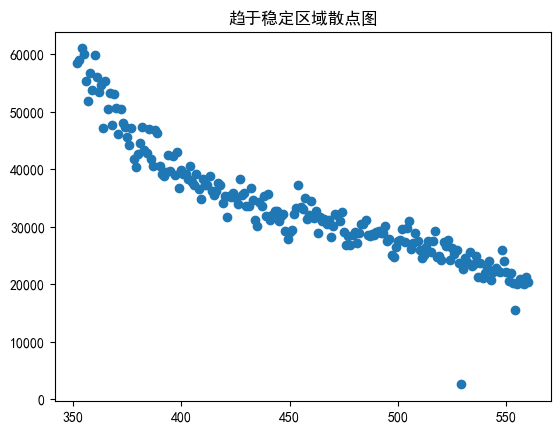

In [7]:
a = 150 # 暂定为150，可以自己设置对应的趋于平稳的阈值
plt.scatter(df['Contest number'][a:], df['Number of  reported results'][a:])
plt.title('趋于稳定区域散点图')
plt.savefig('趋于稳定区域散点图')
plt.show()
# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码

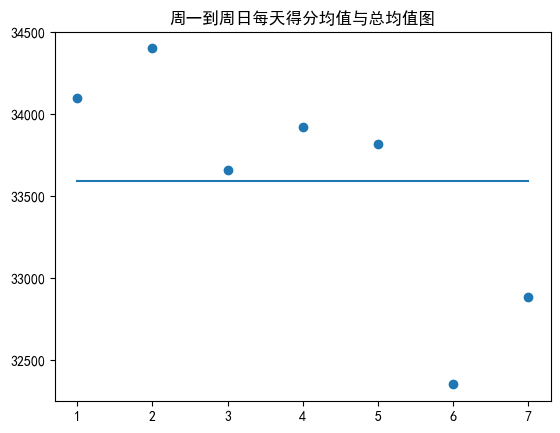

In [8]:
df1 = df.iloc[a:]
weeks = []
for week in range(7):
    df2 = df1[df1['week']==week]
    weeks.append(df2['Number of  reported results'].mean())
plt.scatter([i+1 for i in range(7)], weeks)
plt.plot([i+1 for i in range(7)], [df1['Number of  reported results'].mean() for i in range(7)])
plt.title('周一到周日每天得分均值与总均值图')
plt.savefig('周一到周日每天得分均值与总均值图')
# 其中直线为总均值图，散点图为每天的
plt.show()

In [9]:
np.corrcoef(df['Contest number'][a:], df['Number of  reported results'][a:])

array([[ 1.        , -0.92371301],
       [-0.92371301,  1.        ]])

从图和相关系数可以看出，星期几与得分存在较大的负相关关系，且周末（周六周日）的得分明显小于工作日的得分情况。  
## 所以可以从两种情况进行模型的建立
1. 从整体出发，建立日期或者单词编号与得分的模型   
2. 从趋于稳定的部分出发，建立日期，周几与得分的模型  

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR

In [11]:
X = df[['Contest number']].values
y = df['Number of  reported results'].values

## 1. 对整体部分进行建模   
使用随机森林  
交叉验证模型准确率，调参  
可以自己手动选择模型的参数，或者使用searchCV进行参数的选择。

5687.115555555556 106289097.29206106
5527.75888888889 126863723.50631666
7706.016944444444 199966971.0739583
4437.33277777778 66250583.323583394
7521.849999999999 188154036.68863896
6389.42611111111 115977689.97697778
6129.594722222222 102472941.70436391
6726.048055555557 98924756.97359174
5437.287777777778 78903620.25505559
5897.575142857145 137006254.48541433


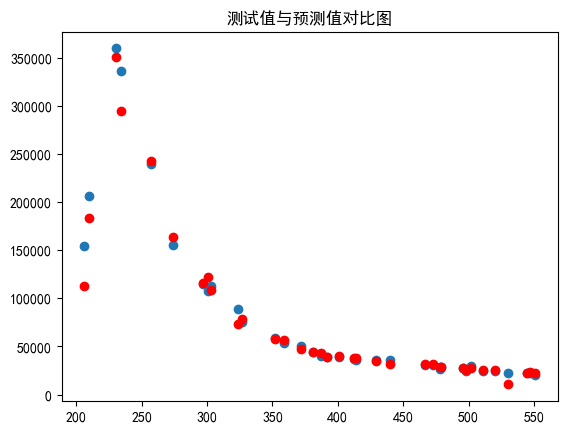

In [12]:
kfold = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kfold.split(X, y):
    train_X = X[train_index, :]
    train_y = y[train_index]
    test_X = X[test_index, :]
    test_y = y[test_index]
    rfr = RandomForestRegressor()
    rfr.fit(train_X, train_y)
    pre_y = rfr.predict(test_X)
    print(mean_absolute_error(test_y, pre_y), mean_squared_error(test_y, pre_y))
plt.scatter(test_X, test_y)
plt.scatter(test_X, pre_y, c='r')
plt.title('测试值与预测值对比图')
plt.savefig('测试值与预测值对比图')
plt.show()

2239.4708635097495 15634509.23268858


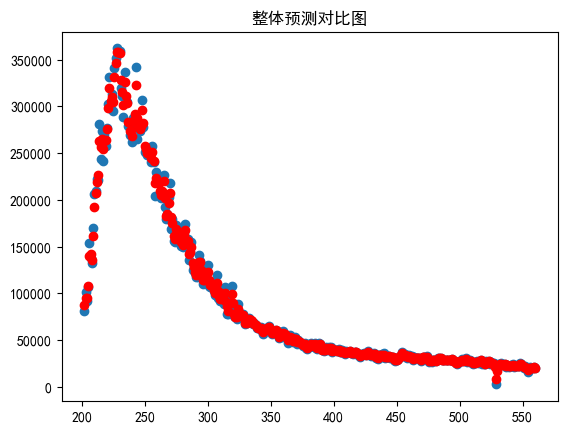

In [13]:
rfr = RandomForestRegressor()
rfr.fit(X,y)
pre_y = rfr.predict(X)
print(mean_absolute_error(y, pre_y),mean_squared_error(y, pre_y))
plt.scatter(X, y)
plt.scatter(X, pre_y, c='r')
plt.title('整体预测对比图')
plt.savefig('整体预测对比图')
plt.show()

使用整体建立的模型对2023年3月1日得分进行预测  

In [14]:
# 将预测的日期转为Contest number
day = int(str(datetime(2023, 3,1)-df['Date'][0]).split('days')[0])+202
# 预测得分
rfr.predict([[day]])

array([20554.27])

这里存在问题，随机森林只能预测定义域范围内的，如果超过定义域的话结果就等于边界值了。

## 对趋于稳定的区域进行建模  
使用支持向量机

In [15]:
df1 = df.iloc[a:]
X = df1[['Contest number', 'week','is_weekend']].values
y = df1['Number of  reported results'].values
acc = []
kfold = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kfold.split(X, y):
    train_X = X[train_index, :]
    train_y = y[train_index]
    test_X = X[test_index, :]
    test_y = y[test_index]
    svr = SVR(kernel='linear')
    svr.fit(train_X, train_y)
    pre_y = svr.predict(test_X)
    acc.append([mean_absolute_error(test_y, pre_y), mean_squared_error(test_y, pre_y)])
acc=np.array(acc)
acc, acc[:,0].mean(),acc[:,1].mean()

(array([[1.50702990e+03, 4.54982035e+06],
        [2.52037648e+03, 1.03369967e+07],
        [2.19893271e+03, 8.92891880e+06],
        [1.91270539e+03, 6.45006451e+06],
        [4.26405126e+03, 4.77364397e+07],
        [3.07976039e+03, 3.26046536e+07],
        [2.32556575e+03, 8.32425972e+06],
        [2.62562362e+03, 1.56176481e+07],
        [2.75764060e+03, 1.37468376e+07],
        [2.35532039e+03, 1.94093393e+07]]),
 2554.7006488074558,
 16770497.829911107)

In [16]:
df1 = df.iloc[a:]
X = df1[['Contest number']].values
y = df1['Number of  reported results'].values
acc = []
kfold = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kfold.split(X, y):
    train_X = X[train_index, :]
    train_y = y[train_index]
    test_X = X[test_index, :]
    test_y = y[test_index]
    svr = SVR(kernel='linear')
    svr.fit(train_X, train_y)
    pre_y = svr.predict(test_X)
    acc.append([mean_absolute_error(test_y, pre_y), mean_squared_error(test_y, pre_y)])
acc=np.array(acc)
acc, acc[:,0].mean(),acc[:,1].mean()

(array([[2.94171730e+03, 2.04343371e+07],
        [2.95533927e+03, 1.97714294e+07],
        [3.77353431e+03, 3.62623356e+07],
        [2.15998762e+03, 8.90287466e+06],
        [3.06346190e+03, 3.02233003e+07],
        [1.78251667e+03, 4.50205544e+06],
        [2.23680746e+03, 9.25979356e+06],
        [2.48349588e+03, 1.78543771e+07],
        [2.92407043e+03, 1.77826264e+07],
        [1.24790238e+03, 2.30474398e+06]]),
 2556.8833231623967,
 16729787.350930031)

对比两者，可以看出在模型中加入是否为周末的判断对于结果的影响不大。  
为提高准确率，降低MSE值，可以调整不同的参数，多次调参后，判断周末的影响。

## 使用支持向量机预测结果

In [17]:
df1 = df.iloc[a:]
X = df1[['Contest number']].values
y = df1['Number of  reported results'].values
day = int(str(datetime(2023, 3,1)-df['Date'][0]).split('days')[0])+202
# 预测得分
svr = SVR(kernel='linear')
svr.fit(X, y)
svr.predict([[day]])
# array([20488.27])随机森林预测的值


array([12208.27878788])

可以多选择几个模型，然后即可得出区间  
随机森林的结果本身就是取得均值，可以选择不输出均值，而输出所有结果  

# 第一题第二小问  
第二小问：  
Q：单词的任何属性是否会影响在硬模式下播放的报告分数百分比？如果是，怎么办？如果没有，为什么不呢？  
A： 任何属性可以包括：唯一字母的数量，单词的词性，常见度，字母的词频  
差异度分析，相关性分析  

### 预处理    
附加的数据文件包含您应该用于此问题的唯一数据。您无需访问《纽约时报》网站或Twitter网站。这些网站上没有其他信息。根据该备注信息，进行预处理的3,4  
1. 词性标注前，检查单词是否准确，是否有特殊字符等
1. 对所有的单词进行词性标注，并使用one-hot编码进行编码    
2. 统计每天的单词中字母个数，重复的只算一个  
3. 从所有单词中，统计每个字母出现的频数  
4. 根据3，计算每天的单词中字母的频数和  


In [18]:
word = ''.join(list(df['Word']))
for letter in range(26):
    letter=chr(letter+97)
    word=word.replace(letter, '')
word
# 单词中存在错误字母，将其改为i，我是这么认为的

' ï'

In [19]:
for i in df['Word']:
    if len(i)!=5:
        print(i)
# 最后一个单词应该是probe，应该是没有开始的r
# tash有,clen在有道词典中未找到该单词，所以我认为clen是clean，
# 也可以选择直接将改单词删掉

favor 
tash
clen
rprobe


In [20]:
# 在网上查找后，进行修改，网上可以找到每一天的答案
df['Word']=df['Word'].apply(lambda x:x.replace('ï', 'i'))
df['Word']=df['Word'].apply(lambda x:x.replace('rprobe', 'probe'))
df['Word']=df['Word'].apply(lambda x:x.replace('clen', 'clean'))
df['Word']=df['Word'].apply(lambda x:x.replace('tash', 'trash'))
df['Word']=df['Word'].apply(lambda x:x.replace('favor ', 'favor'))

In [21]:
word = ''.join(list(df['Word']))
for letter in range(26):
    letter=chr(letter+97)
    word=word.replace(letter, '')
word
# 再次检查是否有除了a-z之外的其他字符

''

In [22]:
# 注： 这里只是将第一版预处理的部分代码放到了这里而已  
# 统计单词中字母的个数  
df['word_len'] = df['Word'].apply(lambda x:len(set(x)))
# 对单词进行词性标注
df['tag'] = df['Word'].apply(lambda x:nltk.pos_tag(nltk.word_tokenize(x))[0][1])

# 这里开始是新的
# 词性进行one-hot编码
for tag in np.unique(df['tag']):
    df[tag]=df['tag']==tag
df.head()


Date  Contest number   Word  Number of  reported results  \
0 2022-01-07             202  slump                        80630   
1 2022-01-08             203  crank                       101503   
2 2022-01-09             204  gorge                        91477   
3 2022-01-10             205  query                       107134   
4 2022-01-11             206  drink                       153880   

   Number in hard mode     1 try   2 tries    3 tries    4 tries    5 tries  \
0                 1362  1.000000  3.000000  23.000000  39.000000  24.000000   
1                 1763  1.000000  5.000000  23.000000  31.000000  24.000000   
2                 1913  1.000000  3.000000  13.000000  27.000000  30.000000   
3                 2242  1.000000  4.000000  16.000000  30.000000  30.000000   
4                 3017  0.990099  8.910891  34.653465  33.663366  15.841584   

   ...     JJ    JJR     MD    NN    NNS   PRP$     RB     VB    VBG    VBN  
0  ...  False  False  False  True  False  False  False  False  False  False  
1  ...  False  False  False  True  False  False  False  False  False  False  
2  ...  False  False  False  True  False  False  False  False  False  False  
3  ...  False  False  False  True  False  False  False  False  False  False  
4  ...  False  False  False  True  False  False  False  False  False  False  

[5 rows x 27 columns]

In [23]:
# 统计频数  
word = ''.join(list(df['Word']))
words = {}
for letter in range(26):
    letter=chr(letter+97)
    words[letter]=[word.count(letter)]
words=pd.DataFrame(words).T
words.columns=['频数']
words.to_excel('字母频数.xlsx')
words

# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码

频数
a  159
b   31
c   71
d   54
e  184
f   33
g   51
h   70
i  102
j    4
k   35
l  112
m   55
n   88
o  133
p   64
q    5
r  134
s   87
t  130
u   64
v   25
w   30
x    8
y   61
z    5

In [24]:
def comput_frequncy(x):
    ans = 0
    for i in x:
        ans+=words['频数'][i]
    return ans
df['频数']=df['Word'].map(comput_frequncy)
df.head()

Date  Contest number   Word  Number of  reported results  \
0 2022-01-07             202  slump                        80630   
1 2022-01-08             203  crank                       101503   
2 2022-01-09             204  gorge                        91477   
3 2022-01-10             205  query                       107134   
4 2022-01-11             206  drink                       153880   

   Number in hard mode     1 try   2 tries    3 tries    4 tries    5 tries  \
0                 1362  1.000000  3.000000  23.000000  39.000000  24.000000   
1                 1763  1.000000  5.000000  23.000000  31.000000  24.000000   
2                 1913  1.000000  3.000000  13.000000  27.000000  30.000000   
3                 2242  1.000000  4.000000  16.000000  30.000000  30.000000   
4                 3017  0.990099  8.910891  34.653465  33.663366  15.841584   

   ...    JJR     MD    NN    NNS   PRP$     RB     VB    VBG    VBN   频数  
0  ...  False  False  True  False  False  False  False  False  False  382  
1  ...  False  False  True  False  False  False  False  False  False  487  
2  ...  False  False  True  False  False  False  False  False  False  553  
3  ...  False  False  True  False  False  False  False  False  False  448  
4  ...  False  False  True  False  False  False  False  False  False  413  

[5 rows x 28 columns]

# 相关性分析
第二小问：  
Q：单词的任何属性是否会影响在硬模式下播放的报告分数百分比？如果是，怎么办？如果没有，为什么不呢？  
A： 任何属性可以包括：唯一字母的数量，单词的词性，常见度，字母的词频  
差异度分析，相关性分析  


关于单词的属性，还可以考虑单词之间的连用的频数，或者是否存在连用：
如：sh,th, or, er等这种经常出现的  
或者其他你能想到的  

在处理单词中包含相同字母的情况，我们将其认为是不同的字母进行评估的，目前在国内的游戏介绍中没有相关描述，如果能找到相应的描述，将该部分进行修改即可。

In [25]:
cor_df=df[df.columns[5:]].corr()
cor_df.to_excel('第一题第二小问-相关性表.xlsx')
cor_df

1 try   2 tries   3 tries   4 tries   5 tries  \
1 try                1.000000  0.618313  0.331405 -0.283656 -0.428151   
2 tries              0.618313  1.000000  0.754171 -0.158832 -0.794868   
3 tries              0.331405  0.754171  1.000000  0.335969 -0.888989   
4 tries             -0.283656 -0.158832  0.335969  1.000000 -0.045509   
5 tries             -0.428151 -0.794868 -0.888989 -0.045509  1.000000   
6 tries             -0.222196 -0.593500 -0.886558 -0.654695  0.691720   
7 or more tries (X) -0.105820 -0.283293 -0.517127 -0.674659  0.120412   
week                 0.040335  0.050387  0.009709  0.015250 -0.038625   
is_weekend           0.065438  0.036596 -0.021423 -0.011661  0.015432   
word_len             0.223327  0.363588  0.429017  0.086557 -0.418282   
DT                   0.035771  0.093026  0.076565 -0.029068 -0.076777   
JJ                   0.016961  0.008555  0.058125  0.040027 -0.019139   
JJR                 -0.031702 -0.049990 -0.086582 -0.088386  0.074115   
MD                   0.002408 -0.015917  0.001978 -0.006468  0.004933   
NN                   0.020710  0.017357 -0.019040 -0.049739 -0.022666   
NNS                 -0.031702 -0.049727 -0.030964  0.083776  0.041121   
PRP$                 0.104607  0.107866  0.092632 -0.026072 -0.093363   
RB                  -0.037346 -0.056661 -0.063366  0.023913  0.064984   
VB                  -0.055063 -0.026739 -0.013259  0.029651  0.042178   
VBG                 -0.016764  0.002025  0.012600  0.025942 -0.001556   
VBN                 -0.031702  0.002804  0.023968  0.033845 -0.012673   
频数                   0.207340  0.399765  0.276700 -0.136620 -0.283226   

                      6 tries  7 or more tries (X)      week  is_weekend  \
1 try               -0.222196            -0.105820  0.040335    0.065438   
2 tries             -0.593500            -0.283293  0.050387    0.036596   
3 tries             -0.886558            -0.517127  0.009709   -0.021423   
4 tries             -0.654695            -0.674659  0.015250   -0.011661   
5 tries              0.691720             0.120412 -0.038625    0.015432   
6 tries              1.000000             0.652555 -0.017162    0.018038   
7 or more tries (X)  0.652555             1.000000 -0.013962   -0.042383   
week                -0.017162            -0.013962  1.000000    0.789524   
is_weekend           0.018038            -0.042383  0.789524    1.000000   
word_len            -0.349888            -0.194380  0.002513   -0.032428   
DT                  -0.047554            -0.023142 -0.053128   -0.033524   
JJ                  -0.053496            -0.065524 -0.000933    0.032548   
JJR                  0.123614             0.041077  0.079140    0.083322   
MD                   0.011997            -0.005212 -0.000313    0.035262   
NN                   0.027386             0.071203  0.041360   -0.029821   
NNS                 -0.021101            -0.023012 -0.000221   -0.033524   
PRP$                -0.064325            -0.035986 -0.079582   -0.033524   
RB                   0.038745            -0.000437 -0.009181    0.004899   
VB                  -0.008088            -0.025466  0.014932    0.077072   
VBG                 -0.018959            -0.025615 -0.092279   -0.058228   
VBN                 -0.029746            -0.023012 -0.026675   -0.033524   
频数                  -0.214633            -0.047756  0.040368    0.062103   

                     word_len  ...       JJR        MD        NN       NNS  \
1 try                0.223327  ... -0.031702  0.002408  0.020710 -0.031702   
2 tries              0.363588  ... -0.049990 -0.015917  0.017357 -0.049727   
3 tries              0.429017  ... -0.086582  0.001978 -0.019040 -0.030964   
4 tries              0.086557  ... -0.088386 -0.006468 -0.049739  0.083776   
5 tries             -0.418282  ...  0.074115  0.004933 -0.022666  0.041121   
6 tries             -0.349888  ...  0.123614  0.011997  0.027386 -0.021101   
7 or more tries (X) -0.194380  ...  0.041077 -0.0

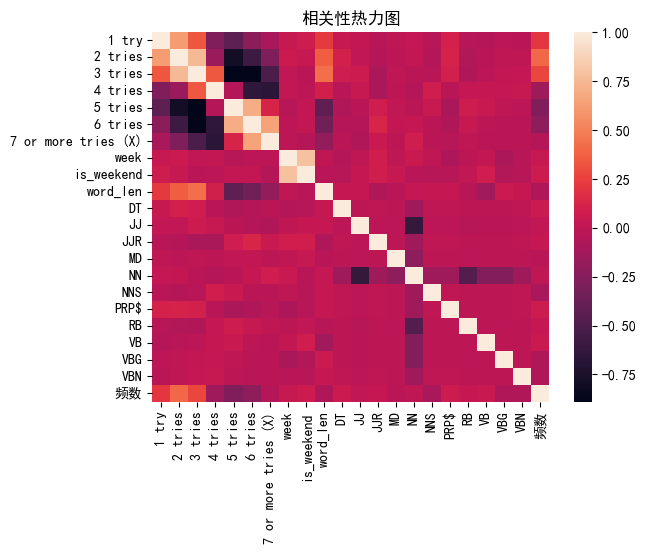

In [26]:
import seaborn as sns
sns.heatmap(cor_df)
plt.title('相关性热力图')
plt.savefig('第一题第二小问相关性热力图')
plt.show()

从上图和上表可以得出具体的相关性信息  
如：频数与尝试两次得出结果的相关性为0.39  
也可以通过散点图简单观察是否存在相关性，以频数与尝试次数的分布为例  

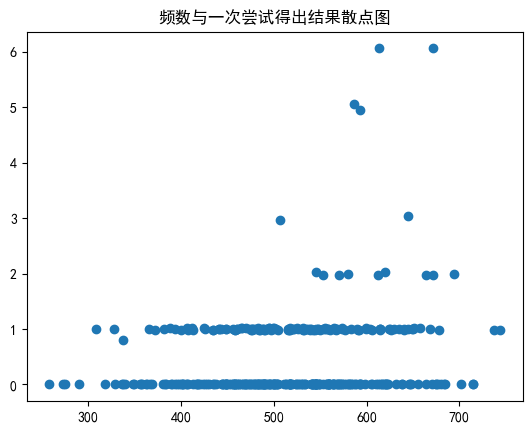

In [27]:
plt.scatter(df['频数'], df['1 try'])
plt.title('频数与一次尝试得出结果散点图')
plt.savefig('频数与一次尝试得出结果散点图')
plt.show()

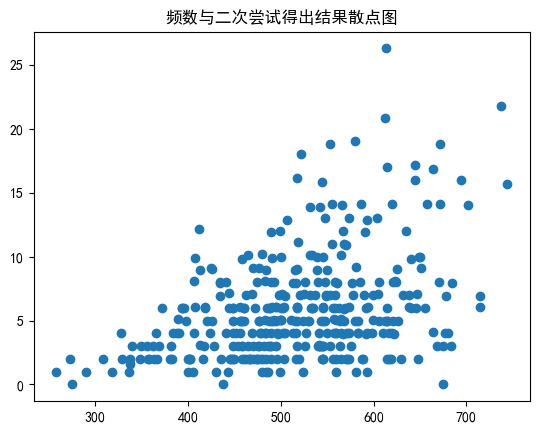

In [28]:
plt.scatter(df['频数'], df['2 tries'])
plt.title('频数与二次尝试得出结果散点图')
plt.savefig('频数与二次尝试得出结果散点图')
plt.show()

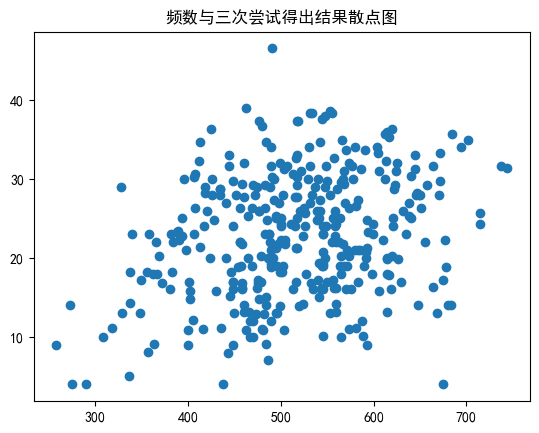

In [29]:
plt.scatter(df['频数'], df['3 tries'])
plt.title('频数与三次尝试得出结果散点图')
plt.savefig('频数与三次尝试得出结果散点图')
plt.show()

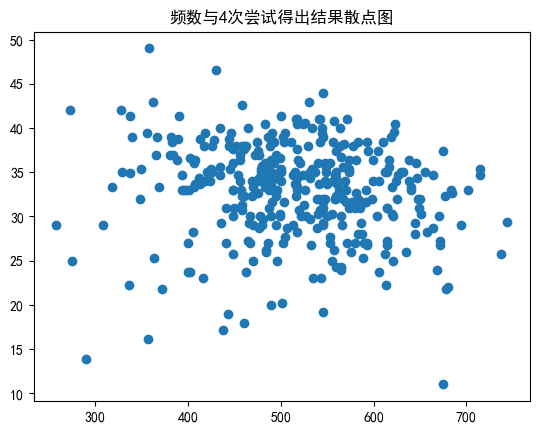

In [30]:
plt.scatter(df['频数'], df['4 tries'])
plt.title('频数与4次尝试得出结果散点图')
plt.savefig('频数与4次尝试得出结果散点图')
plt.show()

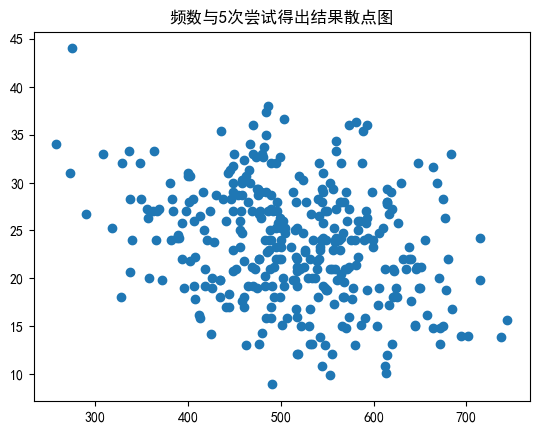

In [31]:
plt.scatter(df['频数'], df['5 tries'])
plt.title('频数与5次尝试得出结果散点图')
plt.savefig('频数与5次尝试得出结果散点图')
plt.show()

从上面几张图也可以看出频数对尝试次数的影响，次数小于3时大概满足正比例分布，大于4后负相关。  
可以同理绘制其他相关信息的图表。

In [32]:
df.to_excel('第一题表.xlsx')

# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码

### 怎么办？
可以使得每天的单词，满足各个属性综合加权后的评分尽量相等。